In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#Loading and Displaying Credit Card Dataset
data= pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
#Summary Information of the Credit Card Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Counting the Occurrences of Each Class
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#Separating and Displaying the Shapes of Fraudulent and Non-Fraudulent Transactions
fraud=data[data.Class==1]
Notfraud=data[data.Class==0]
print(fraud.shape)
print(Notfraud.shape)

(492, 31)
(284315, 31)


In [9]:
#Descriptive Statistics of Transaction Amounts for Fraudulent and Non-Fraudulent Transactions
print("fraud")
print(fraud['Amount'].describe())
print()
print("not fraud")
print(Notfraud['Amount'].describe())

fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

not fraud
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [10]:
#Creating a Balanced Dataset by Sampling Non-Fraudulent Transactions and Combining with Fraudulent Transactions
Notfraud=Notfraud.sample(492)
new_data=pd.concat([Notfraud,fraud],axis=0)
new_data.shape 


(984, 31)

In [11]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
78107,57373.0,-3.045094,0.858256,0.430068,1.175948,-0.462821,0.347001,1.913331,-0.540319,1.594050,...,-0.767655,0.300427,0.298341,0.101710,0.395928,-0.257885,0.490610,0.210274,206.20,0
120510,75853.0,1.292398,-1.399036,0.607182,-1.436069,-1.665340,-0.242372,-1.193908,-0.031905,-1.935930,...,0.035105,0.291077,-0.145648,0.029435,0.339244,-0.113185,0.033294,0.032006,109.00,0
168568,119284.0,1.481286,-1.147787,-1.066337,0.374169,-0.509669,-0.333272,0.069124,-0.159183,0.500744,...,0.188205,0.090413,-0.071144,-0.259495,-0.348446,0.506785,-0.106108,-0.019504,281.08,0
30834,36098.0,1.340340,-0.691585,0.978722,-0.618685,-1.498792,-0.712813,-0.980399,-0.086082,-0.446555,...,0.395567,1.071935,-0.122266,0.445305,0.431845,-0.052348,0.036134,0.029695,29.95,0
275068,166353.0,-1.483002,-0.951295,0.943311,-2.337926,0.883371,-0.382529,-0.780973,0.306887,-0.486016,...,0.264792,0.913690,-0.424382,0.236504,0.125489,-0.168868,0.593337,0.220463,39.99,0


In [12]:
new_data.tail()                                                                                                                                        

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [13]:
new_data['Class'].unique()

array([0, 1])

Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

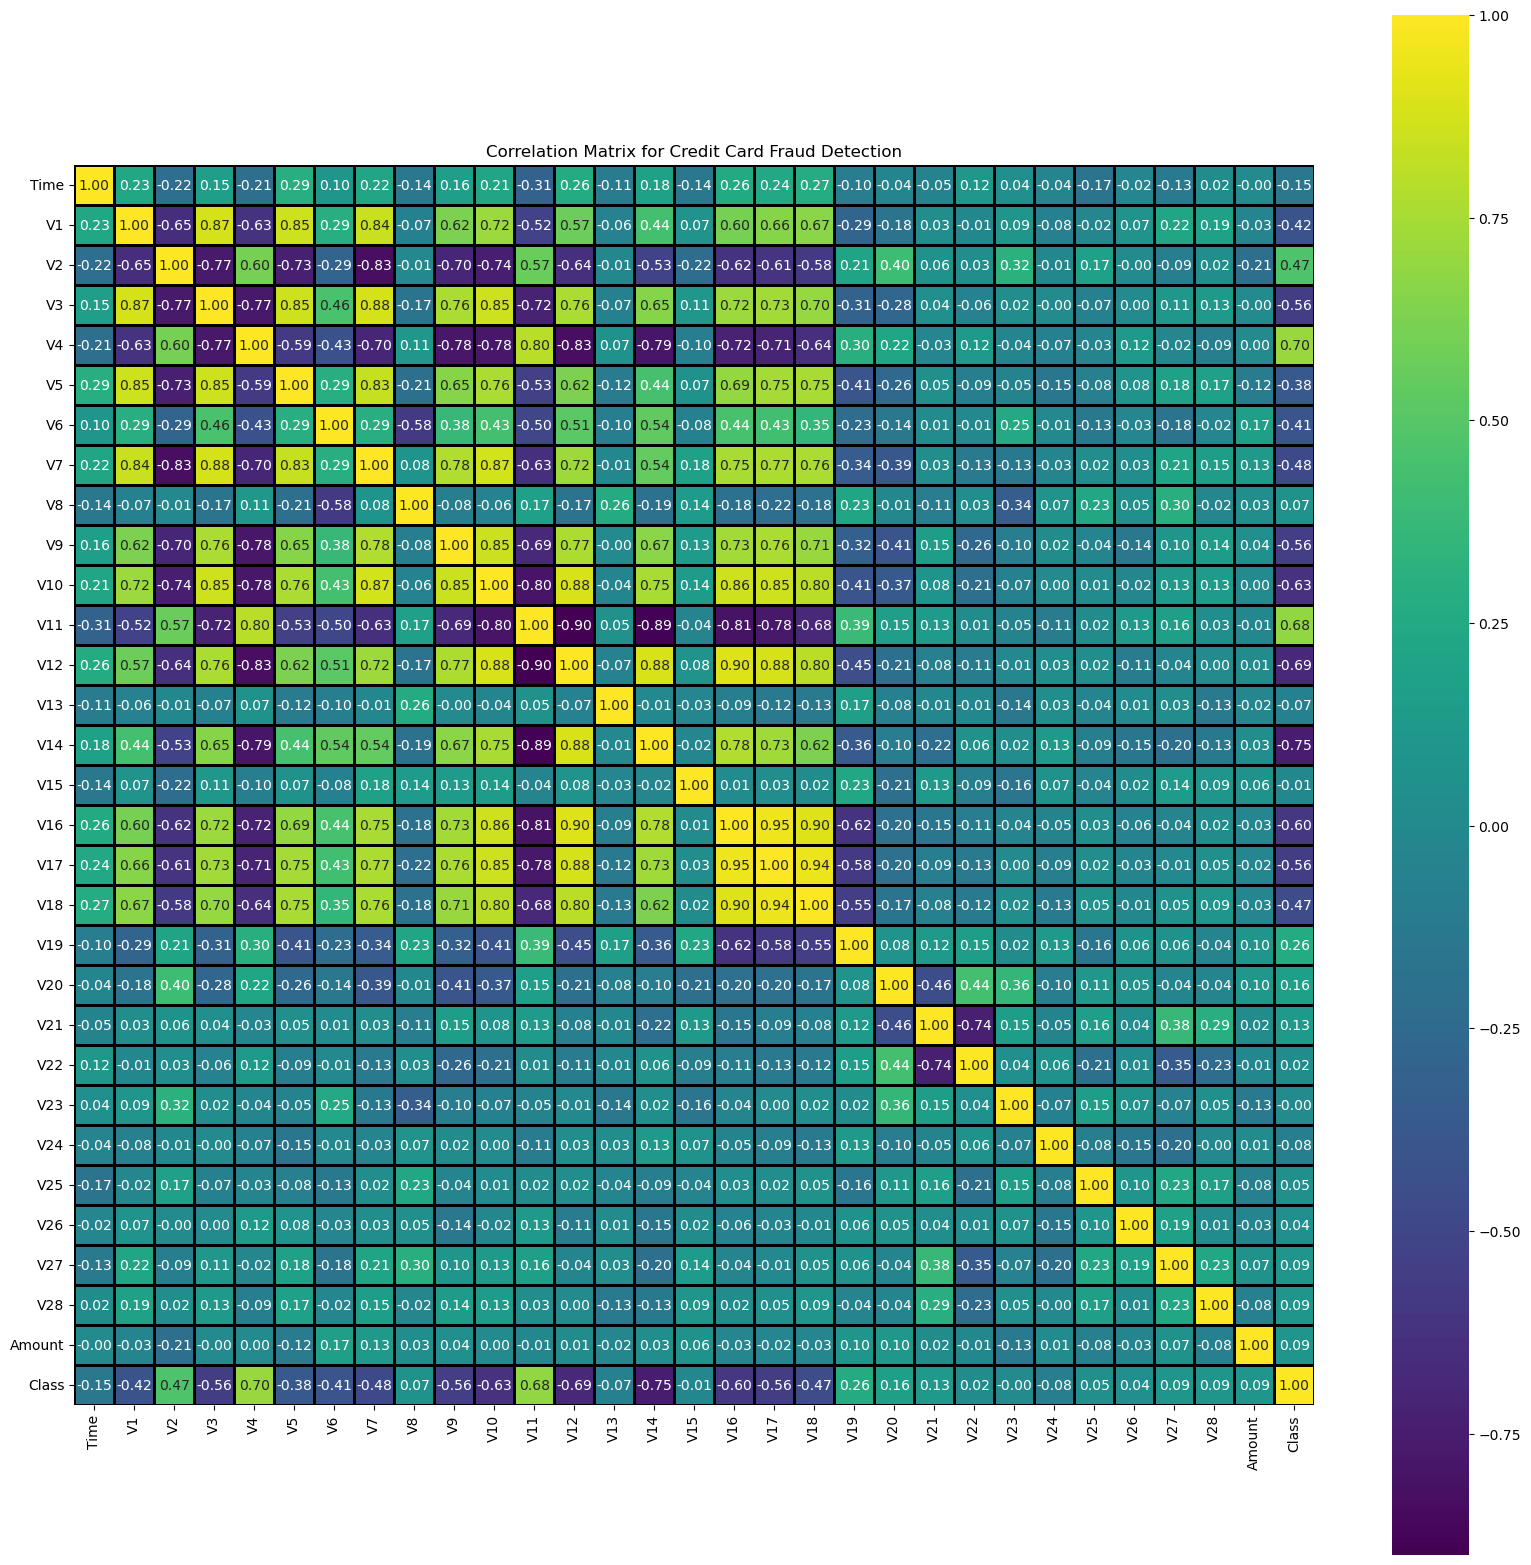

In [19]:
#Visualizing the Correlation Matrix for Credit Card Fraud Detection
corr_mat=new_data.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True,fmt="0.2f",square=True,cmap="viridis",linewidths=0.8,linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")

In [20]:
#Identifying Features with Significant Correlation to the Target Variable
h_feature=corr_mat.index[abs(corr_mat['Class'])>=0.1].tolist()
h_feature.remove('Class')
h_feature

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21']

In [21]:
#Preparing Data for Machine Learning: Feature Selection, Splitting, and Standardization
x=new_data[h_feature]
y=new_data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [22]:
#Training a Logistic Regression Model for Credit Card Fraud Detection
logistic=LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [23]:
#Evaluating the Logistic Regression Model: Predictions and Accuracy Calculation
y_pred=logistic.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [24]:
#Displaying the Accuracy Score of the Logistic Regression Model
print(f"accuracy score = {acc}")

accuracy score = 0.9543147208121827
